In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import scipy.integrate as int
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,7)

# Lotka-Volterra Differential Equations

Based on https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html

$$
\begin{align}
x' &= ax - bxy \\
y' &= -cy + dxy
\end{align}
$$

In [3]:
# set the initial parameters
# a, b, c, d are constant parameters defining the behavior of the population:
#    a is the natural growing rate of rabbits, when there's no fox
#    b is the natural dying rate of rabbits, due to predation
#    c is the natural dying rate of fox, when there's no rabbit
#   d is the factor describing how many caught rabbits let create a new fox

a = 1.
b = 0.7
c = .8
d = 0.9

In [4]:
def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ a*X[0] -   b*X[0]*X[1] ,
                     -c*X[1] +   d*X[0]*X[1] ])

In [5]:
t  = np.linspace(0, 20, 1000)
y0 = [2. , 4.]

X, infodict = int.odeint(dX_dt, y0, t, full_output=True)
infodict['message']

'Integration successful.'

Text(0.5, 1.0, 'Evolution of fox and rabbit populations')

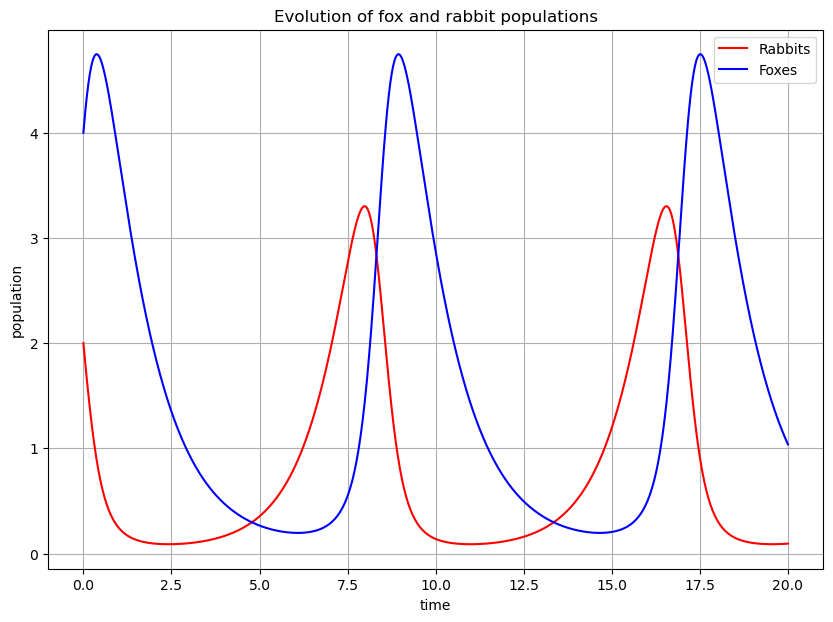

In [6]:
rabbits, foxes = X.T

plt.plot(t, rabbits, 'r-', label='Rabbits')
plt.plot(t, foxes  , 'b-', label='Foxes')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')

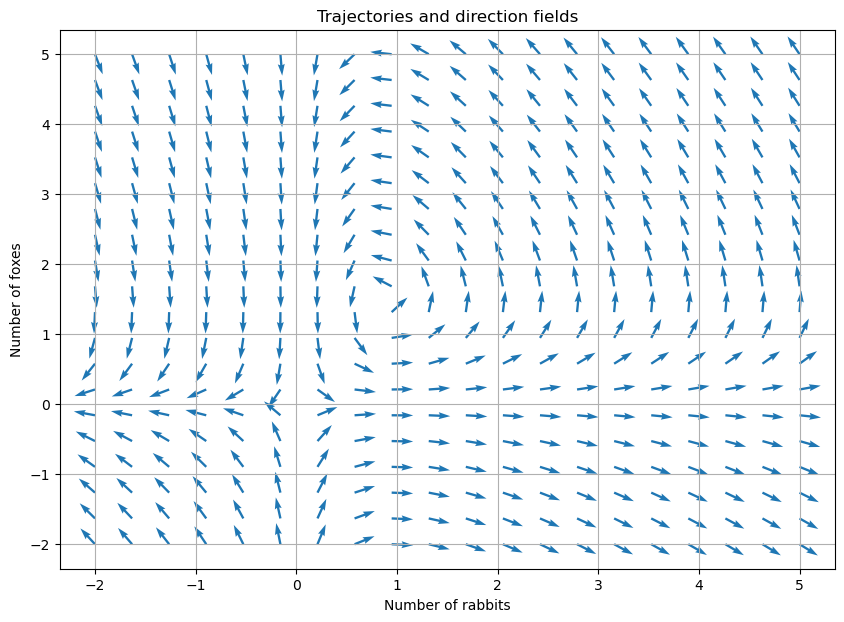

In [7]:
x = np.linspace(-2, 5, 20)
y = np.linspace(-2, 5, 20)

X1 , Y1  = np.meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (np.hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
plt.title('Trajectories and direction fields')
Q = plt.quiver(X1, Y1, DX1, DY1, color="C0")
plt.xlabel('Number of rabbits')
plt.ylabel('Number of foxes')
plt.grid()

A staionary point is where `dX_dt = 0`. From the model equations we see that this is the case for `x[1] = a/b, x[0] = c/d`. Lets check:

In [8]:
(c/d, a/b)

(0.888888888888889, 1.4285714285714286)

## Dependency on Initial Conditions

Different initial conditions can give solutions with different amplitudes and periods as is shown in the following.

In [14]:
t  = np.linspace(0, 5Dependency0, 1000)

y0_1 = [2. , 4.]
X1, infodict = int.odeint(dX_dt, y0_1, t, full_output=True)

y0_2 = [4. , 8.]
X2, infodict = int.odeint(dX_dt, y0_2, t, full_output=True)

Text(0.5, 1.0, 'Evolution of fox and rabbit populations')

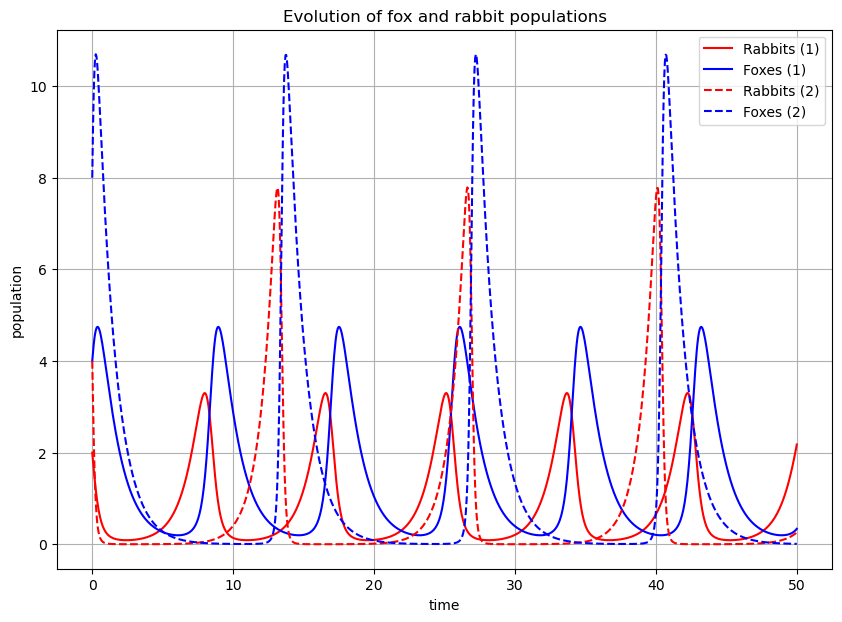

In [15]:
rabbits1, foxes1 = X1.T

plt.plot(t, rabbits1, 'r-', label='Rabbits (1)')
plt.plot(t, foxes1 , 'b-', label='Foxes (1)')

rabbits2, foxes2 = X2.T

plt.plot(t, rabbits2, 'r--', label='Rabbits (2)')
plt.plot(t, foxes2 , 'b--', label='Foxes (2)')


plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')

## Solutions close to fixed (oscillating) Point

What happens with the derivative?

In [38]:
dX_dt([c/d, a/b])

array([0., 0.])

Let's solve the ODE for these initial conditions...

In [39]:
t  = np.linspace(0, 20, 1000)
# y0 = [c/d , a/b]
y0 = [c/d+0.1 , a/b] # a small deviation from the fixed point

X, infodict = int.odeint(dX_dt, y0, t, full_output=True)
infodict['message']

'Integration successful.'

In [40]:
X.T

array([[0.98888889, 0.98887104, 0.98881747, ..., 0.93963285, 0.94114704,
        0.94264732],
       [1.42857143, 1.43114757, 1.43372746, ..., 1.31306746, 1.31428651,
        1.31554242]])

The fixed point is unstable -> if we deviate a small bit from it, the solution starts oscillating and does not return the fixed point.

Text(0.5, 1.0, 'Evolution of fox and rabbit populations')

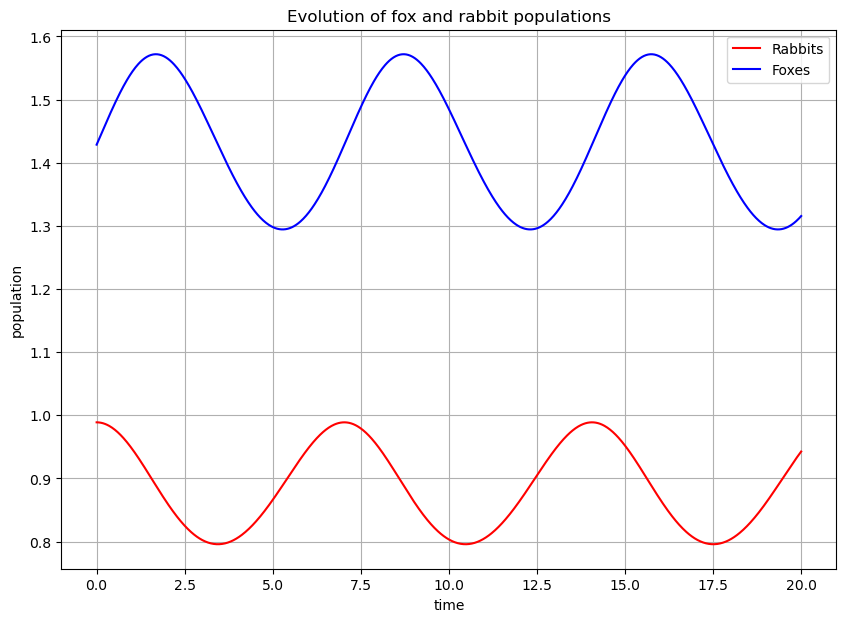

In [41]:
rabbits, foxes = X.T

plt.plot(t, rabbits, 'r-', label='Rabbits')
plt.plot(t, foxes  , 'b-', label='Foxes')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')

## Fourier Analysis

The idea is to calculate a periodigram of the fox / rabbit population.

If the initial point is very close to the fixed point, the population oscillations are sine-like and the periodigram has a well defined peak.

Initial points farther away from the fixed point, a less sine-like and more peaks in the periodigram.

`y0 = [c/d+0.1 , a/b]` => close, periodigram has one defined peak

`y0 = [c/d+3 , a/b]` => far away, periodigram has many peaks

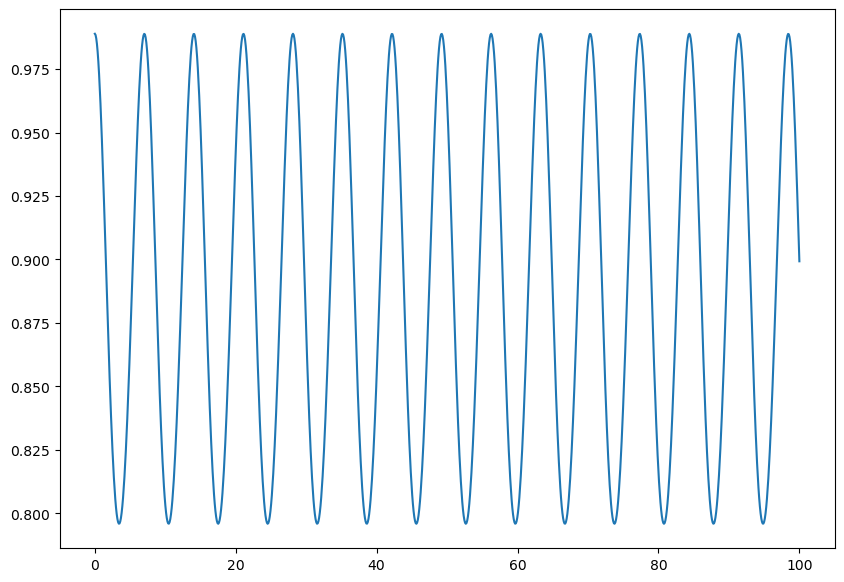

In [60]:
t  = np.linspace(0, 100, 1000)
y0 = [c/d+0.1 , a/b] # deviation from the fixed point
X, infodict = int.odeint(dX_dt, y0, t, full_output=True)
rabbits, foxes = X.T
plt.plot(t,rabbits)

Below is taken from scipy docs. The only tricky thing is to subtract the mean from the signal, otherwise the sta

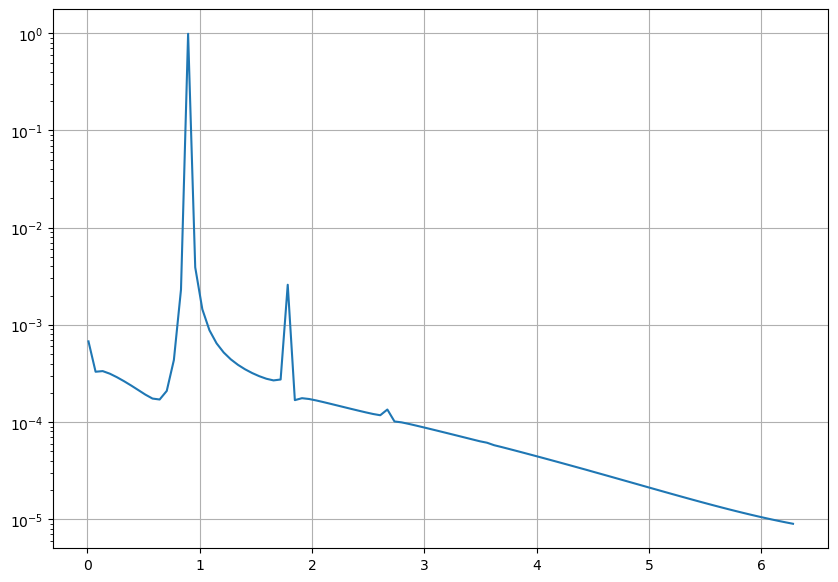

In [61]:
from scipy import signal

ws = np.linspace(0.01, 2*np.pi, 100)
periodogram = signal.lombscargle(t, rabbits - np.mean(rabbits), ws, normalize=True)

plt.semilogy(ws, periodogram)
plt.grid(True)

## Solutions at fixed (saddle) Point

In [14]:
t  = np.linspace(0, 20, 1000)
y0 = [0 , -4.]

X, infodict = int.odeint(dX_dt, y0, t, full_output=True)
X, infodict = int.odeint(dX_dt, y0, t, full_output=True)
infodict['message']

'Integration successful.'

Text(0.5, 1.0, 'Evolution of fox and rabbit populations')

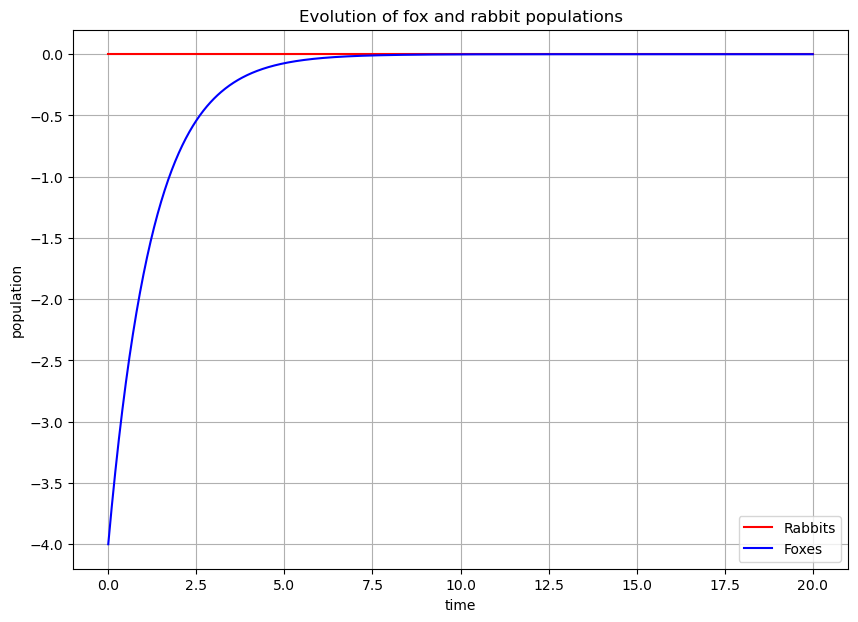

In [13]:
rabbits, foxes = X.T

plt.plot(t, rabbits, 'r-', label='Rabbits')
plt.plot(t, foxes  , 'b-', label='Foxes')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')

In [15]:
t  = np.linspace(0, 20, 1000)
y0 = [4., 0]

X, infodict = int.odeint(dX_dt, y0, t, full_output=True)
X, infodict = int.odeint(dX_dt, y0, t, full_output=True)
infodict['message']

'Integration successful.'

Text(0.5, 1.0, 'Evolution of fox and rabbit populations')

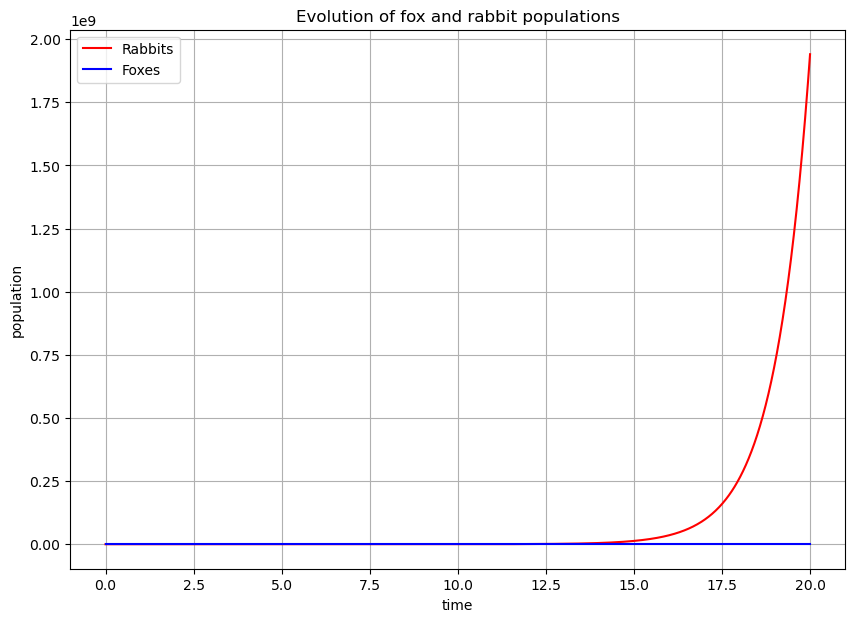

In [16]:
rabbits, foxes = X.T

plt.plot(t, rabbits, 'r-', label='Rabbits')
plt.plot(t, foxes  , 'b-', label='Foxes')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')